In [1]:
library(ComplexHeatmap)
library(circlize)

Loading required package: grid

ComplexHeatmap version 2.15.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements a

In [2]:
getwd()

[1] "/users/genomics/xoel/codebases/co_new/src/FOXG1_subanalysis"

# set-up

Este notebook es como el 5_1, pero calculamos correlaciones entre log2FC y perturbaciones.

In [3]:
load('~/codebases/ASD_IPSC_sept/data/commons.rda', verbose=T)

Loading objects:
  cell.type.colors
  cell.types
  cell.types.nohighmito
  chr_df
  donor_sex
  fig
  flora_paper_list
  gene_type.df
  imprinted.df
  imprinted.genes
  monkey_paper_list
  monkey.genes
  monkey.markers
  nescreg.genes
  nescreg.genes.no_trg
  nescreg.genes.no_trg.early
  nescreg.list
  nescreg.list.no_trg
  nescreg.list.no_trg.early
  nescreg.markers
  nescreg.markers.no_trg
  nescreg.markers.no_trg.early
  nicola_marker_list
  origin_sex.colors
  pat.de
  pat.de.top20
  pat.list
  pat.neu.de
  pat.neu.de.top20
  pat.neu.list
  pat.neu.top20
  pat.top20
  phases
  phases.colors
  protein_coding.genes
  region.genes
  region.list
  region.markers
  samples
  samples.colors
  sex_chr.genes
  sex_chr.genes.x
  sex_chr.genes.y
  shown_2b_list
  shown_4d_list
  tf.genes
  tfs.df
  top100.sub.pat
  top100.subtype
  valid_chr



> setwd("/users/genomics/xoel/codebases/co_new/results/")

> plotdir <- "Plots/"

> dir.create(plotdir, showWarnings = F)

> library(ggplot2)


Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”



> library(ggh4x)

> library(ggpubr)

> library(ggrepel)


Warning message:
“package ‘ggrepel’ was built under R version 4.2.2”



> library(tidyr)


Warning message:
“package ‘tidyr’ was built under R version 4.2.2”



> library(dplyr)


Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union





> fig <- function(width, heigth) {
+     options(repr.plot.width = width, repr.plot.height = heigth)
+ }

> CellTypeAnnot <- c("vRG E", "vRG L", "tRG", "oRG E", 
+     "oRG L", "nIPC", "Neu E", "GluN3", "GluN1", "GluN2", "GluN7", 
+     "GluN5", "GluN4", " ..." ... [TRUNCATED] 

> CellTypeOrder <- c("RGC", "vRG", "vtRG", "oRG", "RG E", 
+     "RG L", "vRG E", "vRG L", "tRG", "oRG E", "oRG L", "Neural", 
+     "GluN", "nIPC", " ..." ... [TRUNCATED] 

> CellTypeLabels <- CellTypeOrder

> CellTypeColor <- setNames(c("#bec1d4", "#7d87b9", 
+     "#023fa5", "#d6bcc0", "#bb7784", "#8e063b", "#b5bbe3", "#8595e1", 
+     "#4a6fe3", "#e6afb ..." ... [TRUNCATED] 

> ctinfo <- data.frame(hex = CellTypeColor, Name = factor(names(CellTypeColor))) %>% 
+     mutate(`Common label` = Name)

> plot.celltype <- ggplot(data = ctinfo, mapping = aes(x = 0, 
+     y = Name, fill = `Common label`)) + geom_tile() + scale_fill_manual(values = Cell .... [TRUNCATED] 

> plot.celltype

> write.csv(ctinfo, file =

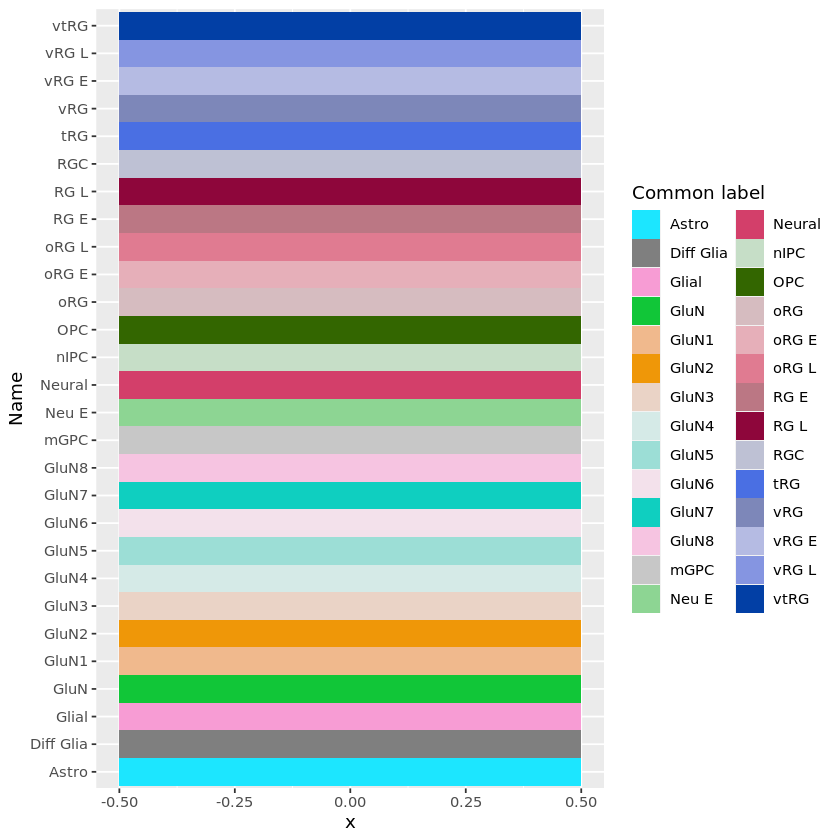

In [4]:
source('../0_Rplots.R', echo=T)

In [5]:
source('../src/FOXG1_subanalysis/0_Rplots.R', echo=T)


> setwd("/users/genomics/xoel/codebases/co_new/results_foxg1/")

> plotdir <- "Plots/"

> dir.create(plotdir, showWarnings = F)

> NetworkScores <- readxl::read_excel("NetworkScoresFull.xlsx")

> NetworkScores <- readxl::read_excel("NetworkScores.xlsx")

> NetworkScores$cell.type <- factor(NetworkScores$cell.type, 
+     levels = CellTypeOrder)

> NetworkScores$SampleLabel <- factor(SampleLabels[NetworkScores$Sample], 
+     levels = SampleLabelOrder)

> NetworkScoresDiseases <- list()

> for (dis in names(gene_list_per_disease)) {
+     dis_genes <- gene_list_per_disease[[dis]]
+     dis_scores <- NetworkScores[NetworkScores$Gene %in .... [TRUNCATED] 

> NetworkScoresDiseases <- do.call("rbind", NetworkScoresDiseases)

> NetworkScoresDiseases$Disease <- factor(NetworkScoresDiseases$Disease, 
+     DiseaseOrder)

> options(warn = -1)

> Perturbations <- readxl::read_excel("PerturbationSummary.xlsx")

> Perturbations$log2_ratio <- as.numeric(Perturbations$log2_ratio)

> Perturbations$c

[1] "none"             "Ultra peripheral" "Peripheral"       "Connector"       
[5] "Kinless"          "Provincial Hub"   "Connector Hub"    "Kinless Hub"

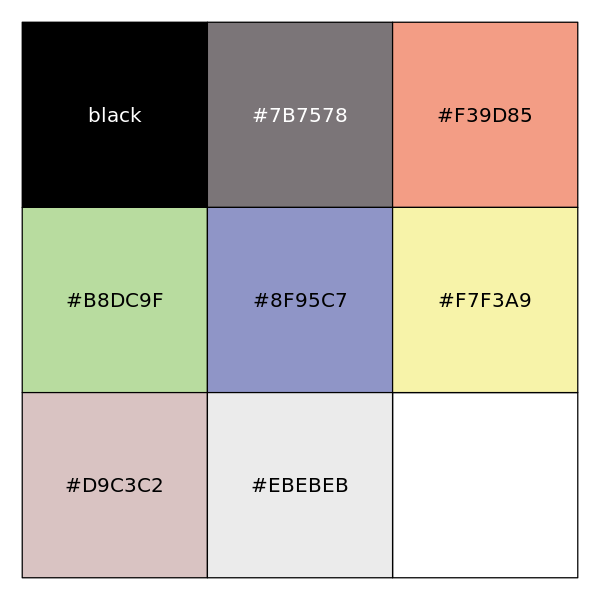

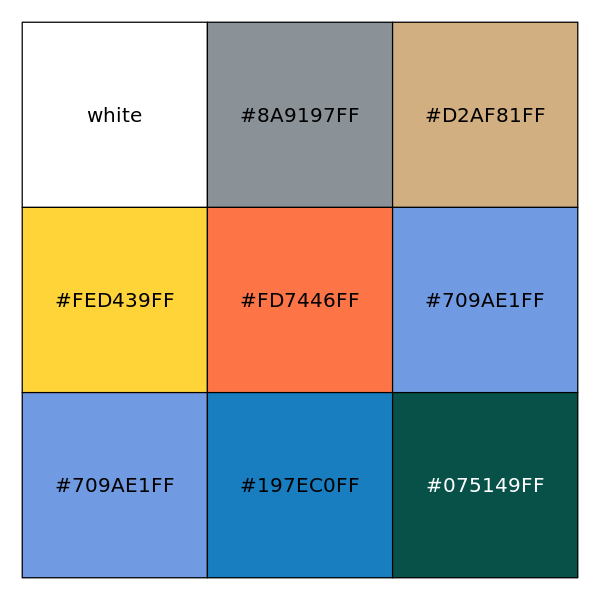

In [6]:
fig(5,5)
names(RoleColors)
scales::show_col(RoleColors)
RoleColorsNew <- setNames(
    c('white', ggsci::pal_simpsons()(16)[c(3,4,1,5,2,7,12)]),
    names(RoleColors))
RoleColorsNew['Peripheral Hub'] <- RoleColorsNew['Provincial Hub']
RoleColorsNew <- RoleColorsNew[
    c('none','Ultra peripheral','Peripheral','Connector','Kinless',
      'Peripheral Hub','Provincial Hub','Connector Hub','Kinless Hub')]
scales::show_col(RoleColorsNew)


## Functions

### `prepare plot parameters for each dataset`

In [7]:
prepare_df <- function(
    df,
    value,
    long.vars=NULL,
    long = F,
    gene = 'Gene',
    na.fill.value = NA,
    cluster_rows=F,
    cluster_columns=F,
    col=NULL,
    rect_gp=list(col = "#888888", lwd = .5),
    col_split=NULL,
    col_title_gp=NULL,
    col_names_gp=NULL,
    col_label = NULL,
    show_rows= T,
    col_names_side = 'top',
    border=TRUE,
    num3D = F,
    na_col = 'darkgrey',
    ...
){
    list(
        df=df,
        value=value,
        long.vars=long.vars,
        long=long,
        gene=gene,
        na.fill.value=na.fill.value,
        cluster_rows=cluster_rows,
        cluster_columns=cluster_columns,
        col=col,
        rect_gp=rect_gp,
        col_split=col_split,
        col_title_gp=col_title_gp,
        col_names_gp=col_names_gp,
        col_label=col_label,
        show_rows=show_rows,
        col_names_side=col_names_side,
        border=border,
        num3D=num3D,
        na_col=na_col
    ) -> hargs
    # print(hargs)
    return(hargs)
}

### `prepare plot matrix`

In [8]:
prepare_matrix <- function(dfs){
    ds <- dfs
    mat <- NULL

    for (i in 1:length(ds)){
        ds[[i]]$df <- as.data.frame(ds[[i]]$df)
        ds[[i]]$name <- names(ds)[i]
    }
    
    for (d in ds){

        d$meta.vars <- c(d$col_label, d$col_split)
        if (d$long){
            d$vars <- d$long.vars
            d$df <- d$df %>% arrange_at(d$vars) 
            
            if (!all(d$vars%in%colnames(d$df))){
                print(colnames(d$df))
                print(d$vars)
                stop()
            }
            d$df$cast_lab <- apply(d$df[,d$vars, drop=F], 2, as.character)%>%apply( MARGIN = 1, FUN=paste, collapse='+')
            d$df$cast_lab <- factor(d$df$cast_lab, unique(d$df$cast_lab))
            d$meta.vars <- c(d$meta.vars, d$vars, 'cast_lab')

            d$df %>% reshape2::dcast(paste(d$gene, 'cast_lab', sep='~'),
                                     value.var = d$value) -> m
            colnames(m) <- c('Gene',
                             paste(d$name, tail(colnames(m),-1), sep='_')) %>% make.names()
            ds[[d$name]]$meta <- unique(d$df[,d$meta.vars, drop=F]) %>%as.data.frame()
            
            rownames(ds[[d$name]]$meta) <- paste(d$name, ds[[d$name]]$meta$cast_lab, sep='_') %>% make.names()

        } else {
            m <- d$df[,c(d$gene, d$value),drop=F]
            d$meta.vars <- c(d$meta.vars, d$value)
            colnames(m) <- c('Gene',
                             paste(d$name, d$value, sep='_')) %>% make.names()

            ds[[d$name]]$meta <- data.frame(row.names = paste(d$name, d$value, sep='_') %>% make.names(),
                                            value=d$value)
            ds[[d$name]]$meta[, d$col_label] <- d$col_label

        }

        ds[[d$name]]$matnames <- tail(colnames(m),-1)
        ds[[d$name]]$meta <- ds[[d$name]]$meta[ds[[d$name]]$matnames,,drop=F]


        mat <- if(is.null(mat)){m}else{merge(mat, m, by='Gene', all=T)}
    }
    mat <- mat[!apply(is.na(mat), 1, all),] 
    rownames(mat) <- mat$Gene
    return(list(ds=ds, mat=mat))
}

filter_geneset <- function(mat, geneset){
    
    if (!is.null(geneset)){
        pmat <- mat
        geneset.mask <- geneset %in% rownames(pmat)
        if (sum(!geneset.mask)>0){message(glue::glue('Ignoring {sum(!geneset.mask)} genes [{paste(head(geneset[!geneset.mask]), collapse=", ")}]'))}
        geneset <- geneset[geneset.mask]
        pmat <- pmat[geneset,, drop=F]
        return(pmat)
    } else {
        return(mat)
    }
}


### `ComplexHeatmap helpers`

In [9]:
as.gpar <- function(l, def=gpar()){
    if (is.null(l)){
        l <- def
   }else{
        class(l) <- 'gpar'
    }
    return(l)
}

ht_opt$TITLE_PADDING = unit(c(4, 4), "points")

do_heatmaps <- function(ds, mat, row_sorter){

    lapply(ds, function(d){
        
        pmat <- mat[,d$matnames, drop=F] %>%mutate_all(function(x){ifelse(is.na(x), d$na.fill.value, x)}) %>% as.matrix
        
        col_split <- if(!is.null(d$col_split)){d$meta[,d$col_split]}else{NULL}
        col_labels <- as.character(if(!is.null(d$col_label)){d$meta[,d$col_label,drop=T]}else{colnames(pmat)})        
        # print(glue::glue('Plotting {nrow(pmat)} genes'))
        htmp.args <- list(
            matrix = pmat, 
            col=d$col, na_col=d$na_col,
            border = d$border,
            show_row_names = d$show_rows,
            row_names_side = 'left',
            column_names_side = d$col_names_side,
            cluster_rows = d$cluster_rows, cluster_columns = d$cluster_columns,
            column_split=col_split,
            column_labels=col_labels,
            name = d$name,
            column_names_gp = as.gpar(d$col_names_gp),
            column_title_gp = as.gpar(d$col_title_gp),
            rect_gp = as.gpar(d$rect_gp) # this must be excluded in 3D
        )
        num3D.args <- head(names(htmp.args),-1)
        
        if (d$num3D){
            if (nrow(pmat)>50){warning('Doing 3D plots for big matrices is discouraged.')}
            h <- rlang::exec(.fn = Heatmap3D, !!!htmp.args[num3D.args])
        } else {
            h <- rlang::exec(.fn = Heatmap, !!!htmp.args)
        }
        h
    }) -> htmps
    return(htmps)
}

combine_heatmaps <- function(htmps){
    htmp <- htmps[[1]]
    for (i in 2:length(htmps)){
        htmp <- htmp + htmps[[i]]
    }
    return(htmp)
}


### `saving plot`

In [10]:
# NG  H
#########
# 17  5
# 141 22
# 25 6
# 36 7
# 56 9.5
h.lm <- lm(formula = 'y~x', data.frame(x=c(17,141,25,36,56), y= c(5,22,6,7,9.5)))$coefficients

# NCT  W
#########
# 8  20
w.lm <- lm(formula = 'y~x', data.frame(x=c(8,5), y= c(20,15)))$coefficients


get_dims <- function(htmp, h.max=25, w.max=21){
    base.dim <- dim(htmp@ht_list$`No. cells ratio\nfinal/initial`)
    # print(base.dim)
    h <- min(h.lm['x']*base.dim[1]+h.lm[1], h.max)
    w <- min(w.lm['x']*base.dim[2]+w.lm[1], w.max)
    return(c( w=w, h=h))
}

### `matrix sorting`

#### `general`

In [11]:
sort.vector.by.vector <- function(x, ref.vec, do.character=T, na.last=T){
    
    if (do.character){
        ref.vec <- as.character(ref.vec)
        x <- as.character(x)
    }
    s <- c(intersect(ref.vec, x))
    if (na.last){
        s <- c(s, c(x[!x%in%ref.vec]))
    }

    return(s)  
}

sort.matrix.by.vector <- function(x, ref.vec, cols=F, do.character=T, na.last=T){
    if (cols){
        return(x[, sort.vector.by.vector(colnames(x), ref.vec= ref.vec, do.character=do.character, na.last=na.last)]%>%t())
    }else{
        return(x[sort.vector.by.vector(rownames(x), ref.vec= ref.vec, do.character=do.character, na.last=na.last),])
    }
}



sort.matrix.diagonal <- function(x, cols=F, direction=1){
    if (cols){
        return(sort.matrix.diagonal(t(x), cols=F, direction=direction)%>%t())
    } else {
        reshape2::melt(as.matrix(x)*direction) %>% rename(row=Var1, col=Var2)%>% 
            mutate(col=factor(as.character(col), colnames(x))) %>%
            arrange(value) %>% group_by(row) %>% slice_head(n=1) %>% # select max col per row
            ungroup() %>% arrange(col, value) %>% # sort columns and genes in max
            select(row) %>% unlist(recursive=T) %>% as.character() -> sorted.rows        
        return(x[sorted.rows,])
    }
}

sort.matrix.grouped.diagonal <- function(x, groups, cols=F, direction=1){
    if (cols){
        return(sort.matrix.grouped.diagonal(t(x), groups, cols=F, direction=direction)%>%t())
    } else {
        xplit <- split(x, groups)
        xplit <- lapply(xplit, sort.matrix.diagonal, direction=direction, cols=F) %>% setNames(nm=names(xplit))
        xplit.avg <- lapply(xplit, colMeans) %>% do.call(what='rbind') %>% as.data.frame()
        sorted.groups <- sort.matrix.diagonal(xplit.avg, direction=direction, cols=F) %>% rownames()
        sorted.groups <- plyr::mapvalues(x=sorted.groups, from = rownames(xplit.avg), to=names(xplit))
        sorted.rows <- xplit[sorted.groups] %>% lapply(rownames) %>% unlist()
        return(x[sorted.rows,])       
        
    }
}



sort.cluster.matrix <- function(x, cols=F, direction=1, centers=5, iter.max = 100, ...){
    if (cols){
        return(sort.cluster.matrix(t(x), cols=F, direction=direction, centers=centers, iter.max = iter.max, ...) %>% t())
    } else {
        if (is.null(centers)){
            centers <- sqrt(nrow(x))
        }

        km <- amap::Kmeans(x, centers=centers, iter.max = iter.max, ...)
        row_clusters <- plyr::mapvalues(x=rownames(x), from=names(km$cluster), to=km$cluster)

        return(sort.matrix.grouped.diagonal(x, groups=row_clusters, cols=F, direction=direction))
    }
}

#### `for ComplexHeatmap`

In [12]:
sorting.funs <- list(
    'sort by Peak phase'= function(x){
        sort.matrix.by.vector(x, ref.vec=genes.phase_order, cols=F)
    },
    
    
    'sort by Transitions' = function(x){
        use.cols <- grep('transition', colnames(x), value=T, fixed=T)
        
        gsub(use.cols, pattern='X..cells.transitioned_', replacement='', fixed=T)%>% 
        gsub(pattern='.KO', replacement='', fixed=T) -> cols
        
        use.cols <- use.cols[sapply(cols, function(x){
            substr(x, start = 1, stop = floor(nchar(x)/2)) == substr(x, start = ceiling(nchar(x)/2)+1, stop=nchar(x))})]

        sorted.genes <- rownames(sort.matrix.diagonal(x[,use.cols, drop=F], cols=F, direction=-1))
        return(x[sorted.genes,])},
    
    
    'cluster by Transitions' = function(x){
        use.cols <- grep('transition', colnames(x), value=T, fixed=T)
        
        gsub(use.cols, pattern='X..cells.transitioned_', replacement='', fixed=T)%>% 
        gsub(pattern='.KO', replacement='', fixed=T) -> cols
        
        use.cols <- use.cols[sapply(cols, function(x){
            substr(x, start = 1, stop = floor(nchar(x)/2)) == substr(x, start = ceiling(nchar(x)/2)+1, stop=nchar(x))})]

        sorted.genes <- rownames(sort.cluster.matrix(x[,use.cols, drop=F], cols=F, direction=-1))
        return(x[sorted.genes,])},
    
    
    'sort by Ratio' = function(x){
        use.cols <- grep('ratio', colnames(x), value=T, fixed=T)
        sorted.genes <- rownames(sort.matrix.diagonal(x[,use.cols, drop=F], cols=F, direction=-1))
        return(x[sorted.genes,])},
    
    
    'cluster by Ratio' = function(x){
        use.cols <- grep('ratio', colnames(x), value=T, fixed=T)
        sorted.genes <- rownames(sort.cluster.matrix(x[,use.cols, drop=F], cols=F, direction=-1))
        return(x[sorted.genes,])},
    
    
    'sort by ASD' = function(x){
        use.cols <- grep('FC', grep('ASD', colnames(x), value=T, fixed=T), value=T, fixed=T)
        sorted.genes <- rownames(sort.matrix.diagonal(x[,use.cols, drop=F], cols=F, direction=-1))
        return(x[sorted.genes,])},
    
    
    'cluster by ASD' = function(x){
        use.cols <- grep('FC', grep('ASD', colnames(x), value=T, fixed=T), value=T, fixed=T)
        sorted.genes <- rownames(sort.cluster.matrix(x[,use.cols, drop=F], cols=F, direction=-1))
        return(x[sorted.genes,])}
)

# X <- dsmats$Gliogenesis$mat[,c(dsmats$Gliogenesis$ds[['No. cells ratio\nfinal/initial\nscaled']]$matnames,
#                                dsmats$Gliogenesis$ds[['% cells\ntransitioned']]$matnames)]
# X <- dsmats$Gliogenesis$mat

## Data for all versions

### Perturbation data

In [13]:
grep('FOXG1',unique(Perturbations$Gene))
length(unique(Perturbations$Gene))

[1] 79

[1] 357

### Gene sets

In [14]:
geneset_list.general <- list(
    `All TFs tested` = unique(Perturbations$Gene),
    `Core TFs (Disease or Phase)` = regulon_cores,
    `Regulons` = regulon_genes,
    `Disease-linked` = disease_genes,
    `Phase core TF or Disease-linked` = union(disease_genes, regulon_cores)
) 
geneset_list.general <- geneset_list.general[names(sort(sapply(geneset_list.general, length)))]

### Markers

In [15]:
filtered.marker.list <- data.table::fread('~/codebases/ASD_IPSC_sept/results/selected_markers/markers_per_donor.nohighmito.with_filters_and_crossed.csv', data.table=F, drop = 1) %>% subset(filter.over.max & !in.sex_chr & (anno_cluster_fct == 'RG early'))

asd.lists <- split(filtered.marker.list$gene, filtered.marker.list$overexpressed.in) %>% lapply(unique)%>% lapply(sort)
names(asd.lists) <- paste0('DEGs: Up in ', names(asd.lists))

asd.lists$All_DEGs <- sort(unique(unlist(asd.lists)))


In [16]:
asd.df <- data.table::fread('~/codebases/ASD_IPSC_sept/results/markers/markers_per_donor.nohighmito.csv',
                            data.table=F, drop=1)  %>% 
    mutate(Donor = gsub(pattern='D8_', replacement='', donor) %>%
                   gsub(pattern='_', replacement=' ')) 

In [35]:
subset(Perturbations, Gene %in% asd.lists$All_DEGs) %>% group_by(Sample) %>% summarise(length(unique(Gene)))

Sample,length(unique(Gene))
<chr>,<int>
Gliogenesis,20
NeuralPCW16,18
NeuralPCW20,19
NeuralPCW21,11
NeuralPCW24,18


### Disease and phase

In [17]:
dis.df <- get.conf.dis.df(unique(Perturbations$Gene))
peak.df <- data.frame(
    Gene=names(peak.per.gene),
    Core=ifelse(names(peak.per.gene)%in%peakcores, 'Core TF', 'Not core TF'),
    PeakSample=peak.per.gene)

peak.df %>% 
    mutate(ps=factor(PeakSample, names(meta.colors$PeakSample))) %>% 
    arrange(ps) %>% select(Gene)%>% 
    unlist(recursive = T)%>% unname -> genes.phase_order

### Imprinting info

In [18]:
imprinted.df %>% 
    mutate(Status=plyr::mapvalues(x=Imprinted.Status,
                                  from=c('Imprinted','Conflicting Data', 'Provisional Data', 
                                         'Predicted', 'Not Imprinted', 'Unknown'),
                                  to=c('Imprinted', 'Predicted/Conflicting/Provisional', 'Predicted/Conflicting/Provisional',
                                       'Predicted/Conflicting/Provisional', 'Not imprinted/No evidence', 'Unknown')),
           Allele.Status = ifelse(Status=='Imprinted', Expressed.Allele, glue::glue('{Expressed.Allele} ({Status})'))
    ) %>% subset(grepl('aternal', Expressed.Allele)) %>% select(gene, Allele.Status) %>% unique() -> imprinted.data
imprinted.pal <- setNames(c('#DD2244', '#DD88AA', '#4422DD', '#AA88DD', 'white'),
                          c(sort(unique(imprinted.data$Allele.Status)), 'NA'))
imprinted.pal 

Maternal 
                                   "#DD2244" 
Maternal (Predicted/Conflicting/Provisional) 
                                   "#DD88AA" 
                                    Paternal 
                                   "#4422DD" 
Paternal (Predicted/Conflicting/Provisional) 
                                   "#AA88DD" 
                                          NA 
                                     "white"

### Prepare data

In [19]:
# markers.donors.asd # gene donor anno_cluster_fct avg_log2FC

In [20]:
list(
    `Peak phase` = prepare_df(long = F,
                              df = peak.df[, c('Gene', 'PeakSample'), drop=F],
                              value = 'PeakSample',
                              col=meta.colors$PeakSample,
                              rect_gp=list(col = "white", lwd = 1),
                              col_label = 'Peak phase'),
    
    `Imprinted` = prepare_df(long = F,
                             df = imprinted.data,
                             gene='gene',
                             value = 'Allele.Status', na.fill.value='NA',
                             col=imprinted.pal,
                             col_label = 'Imprinted?'),
    
    `Phase regulon` = prepare_df(df = peak.df[, c('Gene', 'Core'), drop=F],
                                 value = 'Core',
                                 na.fill.value = 'Not core TF',
                                 col=c('Core TF'='#000000', 'Not core TF'='#FFFFFF'),
                                 col_label = 'Phase regulon'),
    
    `ASD FC` = prepare_df(df = asd.df,
                          long = T, 
                          value = 'avg_log2FC', 
                          long.vars = c('Donor', 'anno_cluster_fct'),
                          gene = 'gene',
                          col_label = 'anno_cluster_fct', col_split = 'Donor',
                          col_title_gp = list(fill = '#FFFFFF')),

    `ASD RGe FC` = prepare_df(df = subset(asd.df, anno_cluster_fct == 'RG early'),
                          long = T, 
                          value = 'avg_log2FC', 
                          long.vars = c('Donor', 'anno_cluster_fct'),
                          gene = 'gene',
                          col_label = 'Donor', col_split = 'anno_cluster_fct'),

    `Disease association` = prepare_df(long = T,
                                       df = dis.df,
                                       long.vars = 'Disease',
                                       value = 'Value',
                                       na.fill.value = 'None',
                                       col=dis.conf.cols,
                                       col_label = 'Disease')
) -> dfs.general



# Produce `[for each sample]`

In [21]:
plot.samples <- unique(Perturbations$Sample)
# plot.samples <- SampleInclude
plot.samples <- plot.samples[plot.samples!='RGCmaturation']
plot.samples

[1] "Gliogenesis" "NeuralPCW16" "NeuralPCW20" "NeuralPCW21" "NeuralPCW24"

In [22]:
plot.genesets <- c(asd.lists, geneset_list.general)

In [23]:
dfs.order <- c(
    # 'Peak phase',
    # 'Phase regulon',
    # 'Imprinted',
    # 'ASD FC',
    'ASD RGe FC',
    'No. cells ratio\nfinal/initial\nscaled',
    '% cells\ntransitioned',
    'Role in GRN'
    # 'Disease association'
)

In [24]:
out.folder <- glue::glue('/users/genomics/xoel/codebases/co_new/results_foxg1/Plots/Perturbation_heatmaps.{Sys.Date()}/')

## Parametrize datasets (grouping variables, colors, labels...) 

In [25]:
dsmats <- list()
for (this.sample in plot.samples){
    message(this.sample)

    pert.df <- subset(Perturbations, (Pert == 'KO')&(Sample == this.sample))
    lapply(split(pert.df, apply(pert.df[,c('Pert', 'Sample', 'cell.type')], 1, paste, collapse='')), function(dct){
        positives <- subset(dct, ratio>=1)    
        negatives <- subset(dct, ratio<1)  
        positives$ratio.scaled <- scales::rescale(x = positives$ratio, from=c(1, max(positives$ratio, na.rm = T)), to=c(0.5,1))
        negatives$ratio.scaled <- scales::rescale(x = negatives$ratio, from=c(min(negatives$ratio, na.rm=T) ,1), to=c(0,0.5))
        rbind(positives, negatives)
    })%>% do.call(what='rbind') %>% as.data.frame() -> pert.df

    trans.df <- subset(PerturbationsCT, (Pert == 'KO')&(Sample == this.sample))
    network.df <- subset(NetworkScores, Sample == this.sample)


    same.trans.col <- trans.df%>%select(CTO,CTF)%>%unique()%>% arrange_all() %>%
        apply(1, function(x){if(x[1]==x[2]){'red'}else{'black'}})

    this.dfs <- list(
        
        `No. cells ratio\nfinal/initial\nscaled` = prepare_df(
            df = pert.df, 
            long = T, long.vars = c('cell.type','Pert'),
            value = 'ratio.scaled',na.fill.value = NA,
            col = colorRamp2(seq(from = 0, to=1, length.out = 3), c("darkblue", "#bbddcc", "#FFEE00")),
            col_label = 'cell.type'),  

        `% cells\ntransitioned` = prepare_df(
            df = trans.df,
            long = T, long.vars = c('CTO','CTF','Pert'),
            value = 'trans.pct', na.fill.value = NA,
            col = colorRamp2(seq(from = 0, to=100, length.out = 11), viridis::magma(11, direction = -1)),
            col_label = 'CTF', col_split = 'CTO',
            col_title_gp = list(fill = '#EEEEEE'), col_names_gp = list(col = same.trans.col),
            num3D=F),
    
        `Role in GRN` = prepare_df(
            df = network.df,
            long = T, long.vars = c('cell.type'),
            value = 'Role name', na.fill.value = 'none',
            col=RoleColorsNew, col_label = 'cell.type'))
    
    dfs <- c(dfs.general, this.dfs)[dfs.order]
    dsmats[[this.sample]] <- prepare_matrix(dfs)
}

Gliogenesis

NeuralPCW16

NeuralPCW20

NeuralPCW21

NeuralPCW24



In [26]:
### subset to genes perturbed:
for (this.sample in names(dsmats)){
    dsmats[[this.sample]]$mat <- dsmats[[this.sample]]$mat[
        rownames(dsmats[[this.sample]]$mat) %in% unique(subset(Perturbations, Sample==this.sample)$Gene),]
}

## All versions `[for each sorting method]` `[for each geneset]` 

In [27]:
for (sort.by in names(sorting.funs)){
    print('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
    print('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
    print(sort.by)
    sort.fn <- sorting.funs[[sort.by]]
    
    for (gset.name in names(plot.genesets)){
        print('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
        print(gset.name)
        geneset <- plot.genesets[[gset.name]]
        
        htmps.samples <- list()
        p.dims <- c(0,0)
        
        for (this.sample in names(dsmats)){
            this.ds <- dsmats[[this.sample]]$ds
            this.mat <- sort.fn(filter_geneset(dsmats[[this.sample]]$mat, geneset = geneset))
            
            htmps <- do_heatmaps(this.ds, this.mat)
            htmp <- combine_heatmaps(htmps)
            htmps.samples[[this.sample]] <- htmp
            
            this.dims <- get_dims(htmp)
            p.dims[1] <- max(p.dims[1], this.dims[1])
            p.dims[2] <- max(p.dims[2], this.dims[2])     
        }
        
        plot.fname <- glue::glue('{out.folder}{sort.by}/{make.names(gset.name)}.pdf')
        dir.create(dirname(plot.fname), recursive = T)
        
        cairo_pdf(plot.fname, onefile = T, width = p.dims[1], height = p.dims[2])
        for (this.sample in names(htmps.samples)){
            grid.newpage()
            draw(htmps.samples[[this.sample]], 
                 column_title=glue::glue('{this.sample} ({sort.by})\nKnock-out simulation results of {gset.name}'))
        }
        dev.off()
        # stop()
    }
}

[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "sort by Peak phase"
[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "DEGs: Up in ASD"


Ignoring 65 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]

Ignoring 65 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]

Ignoring 65 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]

Ignoring 69 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]

Ignoring 65 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "DEGs: Up in Ctrl"


Ignoring 40 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]

Ignoring 42 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]

Ignoring 41 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]

Ignoring 45 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]

Ignoring 42 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "All_DEGs"


Ignoring 99 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]

Ignoring 101 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]

Ignoring 100 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]

Ignoring 108 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]

Ignoring 101 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "Core TFs (Disease or Phase)"


Ignoring 67 genes [ARNT2, CHD1, EP300, GLIS1, GTF2I, KLF16]

Ignoring 73 genes [ARNT2, CHD1, EGR3, EP300, GLIS1, GTF2I]

Ignoring 70 genes [ARNT2, CHD1, EP300, GLIS1, GTF2I, KLF16]

Ignoring 72 genes [ARNT2, CHD1, EGR3, EP300, GLIS1, GTF2I]

Ignoring 68 genes [ARNT2, CHD1, EP300, GLIS1, GTF2I, KLF16]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "All TFs tested"


Ignoring 183 genes [SOX6, TBX15, LHX3, TCF7, ZFHX3, HIVEP1]

Ignoring 205 genes [LMO2, SIN3A, MYBL2, ARID5B, GFI1B, FEZF1]

Ignoring 180 genes [SIN3A, OSR1, MYBL2, SP9, AHRR, SOX17]

Ignoring 207 genes [SIN3A, OSR1, SP9, AHRR, SOX17, GFI1B]

Ignoring 179 genes [SIN3A, OSR1, MYBL2, AHRR, SOX17, GFI1B]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "Disease-linked"


Ignoring 2211 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2208 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2202 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2211 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2200 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "Phase core TF or Disease-linked"


Ignoring 2255 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2255 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2250 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2258 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2248 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "Regulons"


Ignoring 3711 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]

Ignoring 3712 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]

Ignoring 3700 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]

Ignoring 3721 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]

Ignoring 3696 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "sort by Transitions"
[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "DEGs: Up in ASD"


Ignoring 65 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]

Ignoring 65 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]

Ignoring 65 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]

Ignoring 69 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]

Ignoring 65 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "DEGs: Up in Ctrl"


Ignoring 40 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]

Ignoring 42 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]

Ignoring 41 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]

Ignoring 45 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]

Ignoring 42 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "All_DEGs"


Ignoring 99 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]

Ignoring 101 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]

Ignoring 100 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]

Ignoring 108 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]

Ignoring 101 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "Core TFs (Disease or Phase)"


Ignoring 67 genes [ARNT2, CHD1, EP300, GLIS1, GTF2I, KLF16]

Ignoring 73 genes [ARNT2, CHD1, EGR3, EP300, GLIS1, GTF2I]

Ignoring 70 genes [ARNT2, CHD1, EP300, GLIS1, GTF2I, KLF16]

Ignoring 72 genes [ARNT2, CHD1, EGR3, EP300, GLIS1, GTF2I]

Ignoring 68 genes [ARNT2, CHD1, EP300, GLIS1, GTF2I, KLF16]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "All TFs tested"


Ignoring 183 genes [SOX6, TBX15, LHX3, TCF7, ZFHX3, HIVEP1]

Ignoring 205 genes [LMO2, SIN3A, MYBL2, ARID5B, GFI1B, FEZF1]

Ignoring 180 genes [SIN3A, OSR1, MYBL2, SP9, AHRR, SOX17]

Ignoring 207 genes [SIN3A, OSR1, SP9, AHRR, SOX17, GFI1B]

Ignoring 179 genes [SIN3A, OSR1, MYBL2, AHRR, SOX17, GFI1B]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "Disease-linked"


Ignoring 2211 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2208 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2202 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2211 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2200 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "Phase core TF or Disease-linked"


Ignoring 2255 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2255 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2250 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2258 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2248 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "Regulons"


Ignoring 3711 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]

Ignoring 3712 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]

Ignoring 3700 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]

Ignoring 3721 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]

Ignoring 3696 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "cluster by Transitions"
[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "DEGs: Up in ASD"


Ignoring 65 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]

Ignoring 65 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]

Ignoring 65 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]

Ignoring 69 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]

Ignoring 65 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "DEGs: Up in Ctrl"


Ignoring 40 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]

Ignoring 42 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]

Ignoring 41 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]

Ignoring 45 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]

Ignoring 42 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "All_DEGs"


Ignoring 99 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]

Ignoring 101 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]

Ignoring 100 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]

Ignoring 108 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]

Ignoring 101 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "Core TFs (Disease or Phase)"


Ignoring 67 genes [ARNT2, CHD1, EP300, GLIS1, GTF2I, KLF16]

Ignoring 73 genes [ARNT2, CHD1, EGR3, EP300, GLIS1, GTF2I]

Ignoring 70 genes [ARNT2, CHD1, EP300, GLIS1, GTF2I, KLF16]

Ignoring 72 genes [ARNT2, CHD1, EGR3, EP300, GLIS1, GTF2I]

Ignoring 68 genes [ARNT2, CHD1, EP300, GLIS1, GTF2I, KLF16]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "All TFs tested"


Ignoring 183 genes [SOX6, TBX15, LHX3, TCF7, ZFHX3, HIVEP1]

Ignoring 205 genes [LMO2, SIN3A, MYBL2, ARID5B, GFI1B, FEZF1]

Ignoring 180 genes [SIN3A, OSR1, MYBL2, SP9, AHRR, SOX17]

Ignoring 207 genes [SIN3A, OSR1, SP9, AHRR, SOX17, GFI1B]

Ignoring 179 genes [SIN3A, OSR1, MYBL2, AHRR, SOX17, GFI1B]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "Disease-linked"


Ignoring 2211 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2208 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2202 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2211 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2200 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "Phase core TF or Disease-linked"


Ignoring 2255 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2255 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2250 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2258 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2248 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "Regulons"


Ignoring 3711 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]

Ignoring 3712 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]

Ignoring 3700 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]

Ignoring 3721 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]

Ignoring 3696 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "sort by Ratio"
[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "DEGs: Up in ASD"


Ignoring 65 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]

Ignoring 65 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]

Ignoring 65 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]

Ignoring 69 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]

Ignoring 65 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "DEGs: Up in Ctrl"


Ignoring 40 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]

Ignoring 42 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]

Ignoring 41 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]

Ignoring 45 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]

Ignoring 42 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "All_DEGs"


Ignoring 99 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]

Ignoring 101 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]

Ignoring 100 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]

Ignoring 108 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]

Ignoring 101 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "Core TFs (Disease or Phase)"


Ignoring 67 genes [ARNT2, CHD1, EP300, GLIS1, GTF2I, KLF16]

Ignoring 73 genes [ARNT2, CHD1, EGR3, EP300, GLIS1, GTF2I]

Ignoring 70 genes [ARNT2, CHD1, EP300, GLIS1, GTF2I, KLF16]

Ignoring 72 genes [ARNT2, CHD1, EGR3, EP300, GLIS1, GTF2I]

Ignoring 68 genes [ARNT2, CHD1, EP300, GLIS1, GTF2I, KLF16]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "All TFs tested"


Ignoring 183 genes [SOX6, TBX15, LHX3, TCF7, ZFHX3, HIVEP1]

Ignoring 205 genes [LMO2, SIN3A, MYBL2, ARID5B, GFI1B, FEZF1]

Ignoring 180 genes [SIN3A, OSR1, MYBL2, SP9, AHRR, SOX17]

Ignoring 207 genes [SIN3A, OSR1, SP9, AHRR, SOX17, GFI1B]

Ignoring 179 genes [SIN3A, OSR1, MYBL2, AHRR, SOX17, GFI1B]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "Disease-linked"


Ignoring 2211 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2208 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2202 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2211 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2200 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "Phase core TF or Disease-linked"


Ignoring 2255 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2255 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2250 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2258 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2248 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "Regulons"


Ignoring 3711 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]

Ignoring 3712 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]

Ignoring 3700 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]

Ignoring 3721 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]

Ignoring 3696 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "cluster by Ratio"
[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "DEGs: Up in ASD"


Ignoring 65 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]

Ignoring 65 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]

Ignoring 65 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]

Ignoring 69 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]

Ignoring 65 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "DEGs: Up in Ctrl"


Ignoring 40 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]

Ignoring 42 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]

Ignoring 41 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]

Ignoring 45 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]

Ignoring 42 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "All_DEGs"


Ignoring 99 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]

Ignoring 101 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]

Ignoring 100 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]

Ignoring 108 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]

Ignoring 101 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "Core TFs (Disease or Phase)"


Ignoring 67 genes [ARNT2, CHD1, EP300, GLIS1, GTF2I, KLF16]

Ignoring 73 genes [ARNT2, CHD1, EGR3, EP300, GLIS1, GTF2I]

Ignoring 70 genes [ARNT2, CHD1, EP300, GLIS1, GTF2I, KLF16]

Ignoring 72 genes [ARNT2, CHD1, EGR3, EP300, GLIS1, GTF2I]

Ignoring 68 genes [ARNT2, CHD1, EP300, GLIS1, GTF2I, KLF16]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "All TFs tested"


Ignoring 183 genes [SOX6, TBX15, LHX3, TCF7, ZFHX3, HIVEP1]

Ignoring 205 genes [LMO2, SIN3A, MYBL2, ARID5B, GFI1B, FEZF1]

Ignoring 180 genes [SIN3A, OSR1, MYBL2, SP9, AHRR, SOX17]

Ignoring 207 genes [SIN3A, OSR1, SP9, AHRR, SOX17, GFI1B]

Ignoring 179 genes [SIN3A, OSR1, MYBL2, AHRR, SOX17, GFI1B]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "Disease-linked"


Ignoring 2211 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2208 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2202 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2211 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2200 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "Phase core TF or Disease-linked"


Ignoring 2255 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2255 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2250 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2258 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2248 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "Regulons"


Ignoring 3711 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]

Ignoring 3712 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]

Ignoring 3700 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]

Ignoring 3721 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]

Ignoring 3696 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "sort by ASD"
[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "DEGs: Up in ASD"


Ignoring 65 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]

Ignoring 65 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]

Ignoring 65 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]

Ignoring 69 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]

Ignoring 65 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "DEGs: Up in Ctrl"


Ignoring 40 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]

Ignoring 42 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]

Ignoring 41 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]

Ignoring 45 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]

Ignoring 42 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "All_DEGs"


Ignoring 99 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]

Ignoring 101 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]

Ignoring 100 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]

Ignoring 108 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]

Ignoring 101 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "Core TFs (Disease or Phase)"


Ignoring 67 genes [ARNT2, CHD1, EP300, GLIS1, GTF2I, KLF16]

Ignoring 73 genes [ARNT2, CHD1, EGR3, EP300, GLIS1, GTF2I]

Ignoring 70 genes [ARNT2, CHD1, EP300, GLIS1, GTF2I, KLF16]

Ignoring 72 genes [ARNT2, CHD1, EGR3, EP300, GLIS1, GTF2I]

Ignoring 68 genes [ARNT2, CHD1, EP300, GLIS1, GTF2I, KLF16]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "All TFs tested"


Ignoring 183 genes [SOX6, TBX15, LHX3, TCF7, ZFHX3, HIVEP1]

Ignoring 205 genes [LMO2, SIN3A, MYBL2, ARID5B, GFI1B, FEZF1]

Ignoring 180 genes [SIN3A, OSR1, MYBL2, SP9, AHRR, SOX17]

Ignoring 207 genes [SIN3A, OSR1, SP9, AHRR, SOX17, GFI1B]

Ignoring 179 genes [SIN3A, OSR1, MYBL2, AHRR, SOX17, GFI1B]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "Disease-linked"


Ignoring 2211 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2208 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2202 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2211 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2200 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "Phase core TF or Disease-linked"


Ignoring 2255 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2255 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2250 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2258 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2248 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "Regulons"


Ignoring 3711 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]

Ignoring 3712 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]

Ignoring 3700 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]

Ignoring 3721 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]

Ignoring 3696 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "cluster by ASD"
[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "DEGs: Up in ASD"


Ignoring 65 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]

Ignoring 65 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]

Ignoring 65 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]

Ignoring 69 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]

Ignoring 65 genes [ACTA2, ARL2, ATP1A2, C4orf48, CARHSP1, CCK]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "DEGs: Up in Ctrl"


Ignoring 40 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]

Ignoring 42 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]

Ignoring 41 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]

Ignoring 45 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]

Ignoring 42 genes [ALDH2, APOE, BASP1, CACHD1, CCDC144NL-AS1, CEMIP2]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "All_DEGs"


Ignoring 99 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]

Ignoring 101 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]

Ignoring 100 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]

Ignoring 108 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]

Ignoring 101 genes [ACTA2, ALDH2, APOE, ARL2, ATP1A2, BASP1]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "Core TFs (Disease or Phase)"


Ignoring 67 genes [ARNT2, CHD1, EP300, GLIS1, GTF2I, KLF16]

Ignoring 73 genes [ARNT2, CHD1, EGR3, EP300, GLIS1, GTF2I]

Ignoring 70 genes [ARNT2, CHD1, EP300, GLIS1, GTF2I, KLF16]

Ignoring 72 genes [ARNT2, CHD1, EGR3, EP300, GLIS1, GTF2I]

Ignoring 68 genes [ARNT2, CHD1, EP300, GLIS1, GTF2I, KLF16]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "All TFs tested"


Ignoring 183 genes [SOX6, TBX15, LHX3, TCF7, ZFHX3, HIVEP1]

Ignoring 205 genes [LMO2, SIN3A, MYBL2, ARID5B, GFI1B, FEZF1]

Ignoring 180 genes [SIN3A, OSR1, MYBL2, SP9, AHRR, SOX17]

Ignoring 207 genes [SIN3A, OSR1, SP9, AHRR, SOX17, GFI1B]

Ignoring 179 genes [SIN3A, OSR1, MYBL2, AHRR, SOX17, GFI1B]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "Disease-linked"


Ignoring 2211 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2208 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2202 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2211 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2200 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "Phase core TF or Disease-linked"


Ignoring 2255 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2255 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2250 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2258 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]

Ignoring 2248 genes [TSEN34, RAB18, CASK, CENPE, KIF14, QARS]



[1] "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
[1] "Regulons"


Ignoring 3711 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]

Ignoring 3712 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]

Ignoring 3700 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]

Ignoring 3721 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]

Ignoring 3696 genes [SKI, CCND2, CENPF, CRB2, FAM20C, FGFR3]

